In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
import pandas as pd
import numpy as np
import sklearn.preprocessing, sklearn.decomposition, sklearn.linear_model, sklearn.pipeline, sklearn.metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn_pandas import DataFrameMapper

In [4]:
np.random.seed(4242)


In [5]:
adv_df = pd.read_csv('adv_df.csv')

In [6]:
adv_df.tail()

,Unnamed: 0,Player,StartYr,EndYr,SalStartYr,SalEndYr,Salary,SalaryInfl,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,years_of_exp,salary_cap,salary_cap_adjusted,Per_of_Salary_Cap
6217,16844,Delon Wright,2019,2020,2020,2021,9000000.0,8526316.0,PG,27,DAL,73,5.0,21.5,2.6,5.6,0.462,0.6,1.7,0.370,2.0,3.9,0.504,0.519,1.1,1.4,0.770,1.0,2.9,3.8,3.3,1.2,0.3,1.0,1.3,6.9,5,109140000,NaN,0.082463
6218,16846,Thaddeus Young,2019,2020,2020,2021,13545000.0,14190000.0,PF,31,CHI,64,16.0,24.9,4.2,9.4,0.448,1.2,3.5,0.356,3.0,5.9,0.501,0.513,0.7,1.1,0.583,1.5,3.5,4.9,1.8,1.4,0.4,1.6,2.1,10.3,13,109140000,NaN,0.124107
6219,16847,Trae Young,2019,2020,2020,2021,6571800.0,8326471.0,PG,21,ATL,60,60.0,35.3,9.1,20.8,0.437,3.4,9.5,0.361,5.7,11.4,0.501,0.519,8.0,9.3,0.860,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6,2,109140000,NaN,0.060214
6220,16848,Cody Zeller,2019,2020,2020,2021,15415730.0,0.0,C,27,CHO,58,39.0,23.1,4.3,8.3,0.524,0.3,1.3,0.240,4.0,7.0,0.577,0.543,2.1,3.1,0.682,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1,7,109140000,NaN,0.141247
6221,16851,Ivica Zubac,2019,2020,2020,2021,7000000.0,7518518.0,C,22,LAC,72,70.0,18.4,3.3,5.3,0.613,0.0,0.0,0.000,3.3,5.3,0.616,0.613,1.7,2.3,0.747,2.7,4.8,7.5,1.1,0.2,0.9,0.8,2.3,8.3,4,109140000,NaN,0.064138


In [7]:
len(adv_df['Player'].unique())

1306

In [8]:
adv_df.drop(adv_df.columns[0], axis = 1, inplace = True)

In [9]:
christine_subset = adv_df[['FG', 'FTA', 'AST', 'TRB', 'PTS', 'BLK', 'years_of_exp','Salary','Pos','SalStartYr','Player']]

In [10]:
v1 = christine_subset.groupby(['Player','SalStartYr','FG', 'FTA', 'AST', 'TRB', 'PTS', 'BLK', 'years_of_exp','Pos']).agg({'Salary':sum}).reset_index()

In [11]:
v1.head()

,Player,SalStartYr,FG,FTA,AST,TRB,PTS,BLK,years_of_exp,Pos,Salary
0,Aaron Brooks,2008,1.8,1.0,1.7,1.1,5.2,0.1,1,PG,1045560.0
1,Aaron Brooks,2009,4.0,2.2,3.0,2.0,11.2,0.1,2,PG,1118520.0
2,Aaron Brooks,2010,7.0,3.6,5.3,2.6,19.6,0.2,3,PG,2016692.0
3,Aaron Brooks,2013,2.7,1.0,2.2,1.5,7.1,0.2,5,PG,1027424.0
4,Aaron Brooks,2014,3.2,1.3,3.2,1.9,9.0,0.2,6,PG,915243.0


In [12]:
v1['index'] = v1.index

In [13]:
def get_year_before(val):
    experience = v1.loc[v1['index'] == val, 'years_of_exp'].values[0]
    if experience == 1:
        return v1.loc[v1['index'] == val, 'Salary'].values[0]
    else:
        return v1.loc[v1['index'] == (val - 1), 'Salary'].values[0]

In [14]:
v1['salary_before'] = v1['index'].apply(get_year_before)

In [15]:
v1.drop(columns = 'index', inplace = True)

In [16]:
v1.head()

,Player,SalStartYr,FG,FTA,AST,TRB,PTS,BLK,years_of_exp,Pos,Salary,salary_before
0,Aaron Brooks,2008,1.8,1.0,1.7,1.1,5.2,0.1,1,PG,1045560.0,1045560.0
1,Aaron Brooks,2009,4.0,2.2,3.0,2.0,11.2,0.1,2,PG,1118520.0,1045560.0
2,Aaron Brooks,2010,7.0,3.6,5.3,2.6,19.6,0.2,3,PG,2016692.0,1118520.0
3,Aaron Brooks,2013,2.7,1.0,2.2,1.5,7.1,0.2,5,PG,1027424.0,2016692.0
4,Aaron Brooks,2014,3.2,1.3,3.2,1.9,9.0,0.2,6,PG,915243.0,1027424.0


In [17]:
v1.index = v1['Player']

In [18]:
v1 = v1[v1['years_of_exp'] != 1]

In [19]:
v1.head()

,Player,SalStartYr,FG,FTA,AST,TRB,PTS,BLK,years_of_exp,Pos,Salary,salary_before
Player,,,,,,,,,,,,
Aaron Brooks,Aaron Brooks,2009,4.0,2.2,3.0,2.0,11.2,0.1,2,PG,1118520.0,1045560.0
Aaron Brooks,Aaron Brooks,2010,7.0,3.6,5.3,2.6,19.6,0.2,3,PG,2016692.0,1118520.0
Aaron Brooks,Aaron Brooks,2013,2.7,1.0,2.2,1.5,7.1,0.2,5,PG,1027424.0,2016692.0
Aaron Brooks,Aaron Brooks,2014,3.2,1.3,3.2,1.9,9.0,0.2,6,PG,915243.0,1027424.0
Aaron Brooks,Aaron Brooks,2015,4.2,2.1,3.2,2.0,11.6,0.2,7,PG,2250000.0,915243.0


In [20]:
christine_subset = v1

In [21]:
q1 = christine_subset['Salary'].quantile(.25)

In [22]:
q3 = christine_subset['Salary'].quantile(.75)

In [23]:
iqr = q3 - q1
iqr

7278033.0

In [24]:
lower = q1 - 1.5 * iqr
lower

-8929249.5

In [25]:
upper = q3 + 1.5 * iqr
upper

20182882.5

In [26]:
christine_subset.shape

(5343, 12)

In [27]:
outliers = christine_subset[christine_subset['Salary'] >= upper]
len(outliers)

240

In [28]:
christine_subset = christine_subset[christine_subset['Salary'] < upper]

In [29]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
christine_subset['SalStartYr'] = le.fit_transform(christine_subset['SalStartYr'])
christine_subset['Player'] = le.fit_transform(christine_subset['Player'])
christine_subset['Pos'] = le.fit_transform(christine_subset['Pos'])

In [30]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as pl

In [31]:
to_elbow = christine_subset.drop(columns = ['salary_before'], axis = 1)

In [32]:
distortions = []
inertias = []

K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(to_elbow)
    kmeanModel.fit(to_elbow)
 
    distortions.append(sum(np.min(cdist(to_elbow, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / to_elbow.shape[0])
    
    inertias.append(kmeanModel.inertia_)

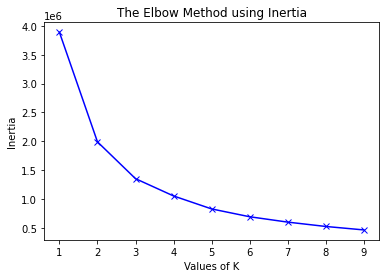

In [33]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [34]:
kmeans=KMeans(n_clusters=3,random_state=1)

In [35]:
kmeans.fit(to_elbow)

KMeans(n_clusters=3, random_state=1)

In [36]:
to_elbow['Cluster'] = kmeans.labels_

In [37]:
to_elbow['Cluster'].unique()

array([0, 1, 2], dtype=int32)

In [38]:
to_elbow.shape

(5103, 12)

In [39]:
christine_subset['Cluster'] = to_elbow['Cluster']

In [40]:
christine_subset.head()

,Player,SalStartYr,FG,FTA,AST,TRB,PTS,BLK,years_of_exp,Pos,Salary,salary_before,Cluster
Player,,,,,,,,,,,,,
Aaron Brooks,0,8,4.0,2.2,3.0,2.0,11.2,0.1,2,5,1118520.0,1045560.0,0
Aaron Brooks,0,9,7.0,3.6,5.3,2.6,19.6,0.2,3,5,2016692.0,1118520.0,0
Aaron Brooks,0,12,2.7,1.0,2.2,1.5,7.1,0.2,5,5,1027424.0,2016692.0,0
Aaron Brooks,0,13,3.2,1.3,3.2,1.9,9.0,0.2,6,5,915243.0,1027424.0,0
Aaron Brooks,0,14,4.2,2.1,3.2,2.0,11.6,0.2,7,5,2250000.0,915243.0,0


In [41]:
df = christine_subset.loc[:,'FG':]
cluster_0 = df[df["Cluster"] == 0]
cluster_1 = df[df["Cluster"] == 1]
cluster_2 = df[df["Cluster"] == 2]

In [42]:
x_0 = cluster_0.loc[:, :"salary_before"]
y_0 = cluster_0["Salary"]
x_1 = cluster_1.loc[:, :"salary_before"]
y_1 = cluster_1["Salary"]
x_2 = cluster_2.loc[:, :"salary_before"]
y_2 = cluster_2["Salary"]

In [43]:
x_0 = x_0.drop('Salary',axis=1)
x_1 = x_1.drop('Salary',axis=1)
x_2 = x_2.drop('Salary',axis=1)

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [45]:
x_train0, x_test0, y_train0, y_test0 = train_test_split(x_0, y_0, test_size = 0.2, random_state = 9149)
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_1, y_1, test_size = 0.2, random_state = 9149)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_2, y_2, test_size = 0.2, random_state = 9149)

In [46]:
from sklearn.preprocessing import PolynomialFeatures
poly0= PolynomialFeatures(2)
poly0.fit(x_train0, y_train0)
x_poly0 = poly0.fit_transform(x_train0)
p_reg_0 = LinearRegression()
p_reg_0.fit(x_poly0, y_train0)

LinearRegression()

In [47]:
y_pred0 = p_reg_0.predict(poly0.fit_transform(x_test0))
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_pred0, y_test0))

1034125.7414786965

In [48]:
r2_score(y_true = y_test0, y_pred = y_pred0)

0.24348758465409137

In [49]:
poly1= PolynomialFeatures(2)
poly1.fit(x_train1, y_train1)
x_poly1 = poly1.fit_transform(x_train1)
p_reg_1 = LinearRegression()
p_reg_1.fit(x_poly1, y_train1)

LinearRegression()

In [50]:
y_pred1 = p_reg_1.predict(poly1.fit_transform(x_test1))
np.sqrt(mean_squared_error(y_pred1, y_test1))

1689733.1028019667

In [51]:
r2_score(y_true = y_test1, y_pred = y_pred1)

-0.020783725967303823

In [52]:
poly2= PolynomialFeatures(2)
poly2.fit(x_train2, y_train2)
x_poly2 = poly2.fit_transform(x_train2)
p_reg_2 = LinearRegression()
p_reg_2.fit(x_poly2, y_train2)

LinearRegression()

In [53]:
y_pred2 = p_reg_2.predict(poly2.fit_transform(x_test2))
np.sqrt(mean_squared_error(y_pred2, y_test2))

2742530.236831735

In [54]:
r2_score(y_true = y_test2, y_pred = y_pred2)

-0.06931223610345505